# Como investimentos influenciam o ganho de medalhas em olimpíadas<img src="https://upload.wikimedia.org/wikipedia/commons/a/a7/Olympic_flag.svg" width="324" height="324" align="right">
## Membros:
- Ana Beatriz Oliveira de Macedo
- Abdul Malik 
- Bruna Bellini Faria
- Heloisa Mariani
- Marina Lara

**Matéria**:
Storytelling

In [36]:
import pandas as pd
import requests
import urllib.request
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
import seaborn as sns

In [107]:
#Web Scraping de desempenho do Brasil em todas as olímpiadas
url = 'https://pt.wikipedia.org/wiki/Lista_de_medalhas_brasileiras_nos_Jogos_Ol%C3%ADmpicos'
req = requests.get(url)
print(req.status_code)

200


In [108]:
url = url = 'https://pt.wikipedia.org/wiki/Lista_de_medalhas_brasileiras_nos_Jogos_Ol%C3%ADmpicos'
dfs = pd.read_html(url)
df = dfs[0]
print(df)

     Ano             Local  Ouro  Prata  Bronze  Total Colocação
0   2020            Tóquio   7.0    6.0     8.0   21.0       12º
1   2016    Rio de Janeiro   7.0    6.0     6.0   19.0       13º
2   2012           Londres   3.0    5.0     9.0   17.0       22º
3   2008            Pequim   3.0    4.0    10.0   17.0       22º
4   2004            Atenas   5.0    2.0     3.0   10.0       16º
5   2000            Sydney   NaN    6.0     6.0   12.0       52º
6   1996           Atlanta   3.0    3.0     9.0   15.0       25º
7   1992         Barcelona   2.0    1.0     NaN    3.0       25º
8   1988              Seul   1.0    2.0     3.0    6.0       24º
9   1984       Los Angeles   1.0    5.0     2.0    8.0       19º
10  1980            Moscou   2.0    NaN     2.0    4.0       17º
11  1976          Montreal   NaN    NaN     2.0    2.0       36º
12  1972           Munique   NaN    NaN     2.0    2.0       41º
13  1968  Cidade do México   NaN    1.0     2.0    3.0       35º
14  1964            Tóqui

In [109]:
df.to_csv('Brasil-Medalhas.csv', index=False)

In [110]:
df.drop([19, 20, 21, 22, 24, 25, 26, 27, 28], axis=0, inplace=True)

In [111]:
df.fillna('0', inplace=True)

In [112]:
df

,Ano,Local,Ouro,Prata,Bronze,Total,Colocação
0,2020,Tóquio,7,6,8,21.0,12º
1,2016,Rio de Janeiro,7,6,6,19.0,13º
2,2012,Londres,3,5,9,17.0,22º
3,2008,Pequim,3,4,10,17.0,22º
4,2004,Atenas,5,2,3,10.0,16º
5,2000,Sydney,0,6,6,12.0,52º
6,1996,Atlanta,3,3,9,15.0,25º
7,1992,Barcelona,2,1,0,3.0,25º
8,1988,Seul,1,2,3,6.0,24º
9,1984,Los Angeles,1,5,2,8.0,19º


In [22]:
medals_bra = px.scatter(df, x='Ano', y='Total', title='Evolução de medalhas brasileiras nas olimpíadas', color='Ano')
medals_bra.show()

In [58]:
import plotly.express as px
fig = px.bar(df, x='Total', y="Ano", color='Total', orientation='h',
             hover_data=["Ouro", "Prata", 'Bronze'],
             height=400,
             title='Tipo de medalhas por edição')
fig.show()

In [8]:
df.insert(7, "Valor recebido pelo COB", [, 23, 24, 21], True)
df.insert(8, 'Valor repassado as confederações')

SyntaxError: invalid syntax (<ipython-input-8-fd42be1361a2>, line 1)

ValueError: shape mismatch: objects cannot be broadcast to a single shape

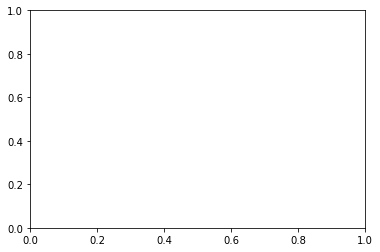

In [113]:
import numpy as np
ouro = np.array((7, 7, 3, 3, 5,0,3,2,1,1,2,0,0,0,0,0,1,1,0,1))
prata = np.array((6,6,5,4,2,6,3,1,2,5,0,0,0,1,0,0,0,0,0,1))
bronze =np.array((8,6,9,10,3,6,9,3,0,2,2,2,2,2,1,2,0,2,1,1))
  
ind = np.arange(3)
width = 0.35       

p1 = plt.bar(ind,ouro, width, color='y')
p2 = plt.bar(ind, prata, width, color='silver')
p3 = plt.bar(ind, bronze, width, color='peru')

plt.ylabel('Medalhas')
plt.title('Tipos de medalhas')
#plt.yticks(np.arange(0,81,10))
plt.legend((p1[0], p2[0], p3[0]), ('Ouro', 'Prata', "Bronze"))
plt.show()

<AxesSubplot:title={'center':'Stacked Bar Graph by dataframe'}, xlabel='Edição'>

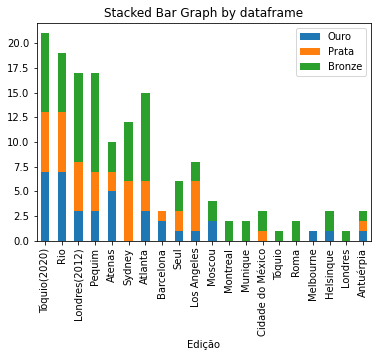

In [125]:
df2 = pd.DataFrame([['Tóquio(2020)', 7,6,8], ['Rio', 7,6,6], ['Londres(2012)', 3,5,9],
                   ['Pequim', 3,4,10], ['Atenas',5,2,3],['Sydney', 0,6,6], ['Atlanta', 3,3,9], ['Barcelona', 2,1,0],
                   ['Seul',1,2,3], ['Los Angeles',1,5,2],['Moscou',2,0,2],['Montreal',0,0,2],['Munique',0,0,2],
                   ['Cidade do México',0,1,2],['Tóquio',0,0,1],['Roma',0,0,2],['Melbourne',1,0,0],['Helsinque',1,0,2],
                   ['Londres',0,0,1],['Antuérpia',1,1,1]],columns=['Edição', 'Ouro', 'Prata', 'Bronze'])

df2.plot(x='Edição', kind='bar', stacked=True,title='Stacked Bar Graph by dataframe')

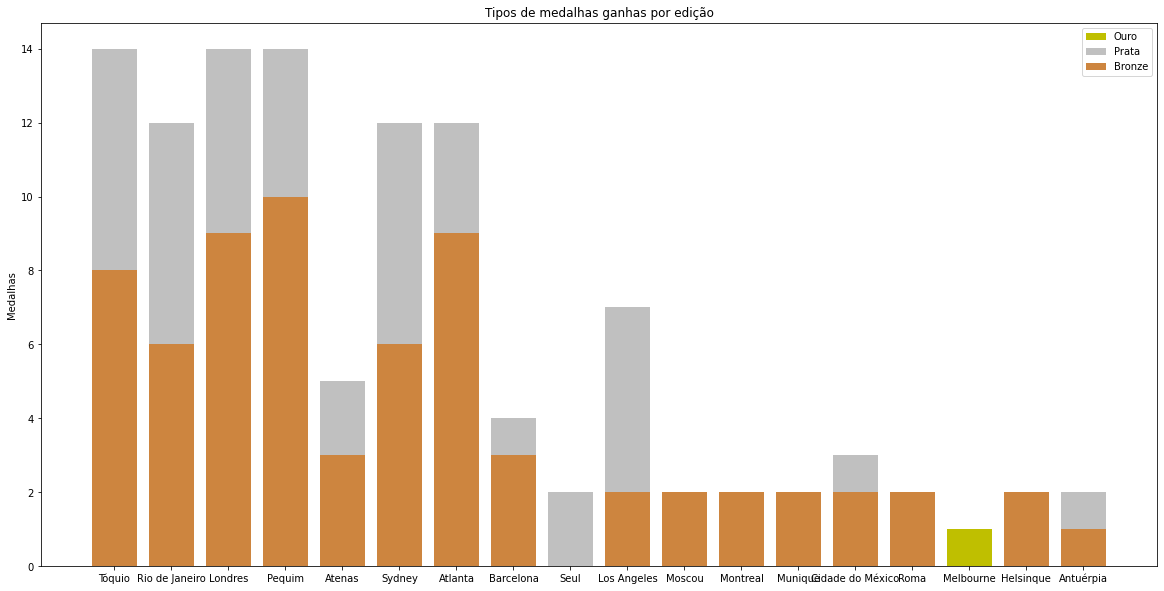

In [104]:
x = ['Tóquio','Rio de Janeiro','Londres','Pequim','Atenas','Sydney','Atlanta','Barcelona','Seul','Los Angeles',
     'Moscou','Montreal','Munique','Cidade do México','Tóquio','Roma','Melbourne','Helsinque','Londres','Antuérpia']
ouro = [7, 7, 3, 3, 5,0,3,2,1,1,2,0,0,0,0,0,1,1,0,1]
prata = [6,6,5,4,2,6,3,1,2,5,0,0,0,1,0,0,0,0,0,1]
bronze =[8,6,9,10,3,6,9,3,0,2,2,2,2,2,1,2,0,2,1,1]
fig, ax = plt.subplots(figsize=(20,10))
plt.bar(x, ouro, color='y')
plt.bar(x, prata, bottom=bronze,color='silver')
plt.bar(x, bronze, color='peru')
plt.ylabel("Medalhas")
plt.legend(["Ouro", "Prata", "Bronze"])
plt.title("Tipos de medalhas ganhas por edição")
plt.show()

In [16]:
#Web scraping de medalhas ganhas por estado brasileiro
url2 = 'https://pt.wikipedia.org/wiki/Lista_de_medalhas_brasileiras_nos_Jogos_Ol%C3%ADmpicos'
df_estado = pd.read_html(url2)
df2 = df_estado[22]
print(df2)

                 Estado  Unnamed: 1  Unnamed: 2  Unnamed: 3  Unnamed: 4
0             São Paulo          45          67          92         204
1        Rio de Janeiro          27          30          36      93[14]
2          Minas Gerais          14          13           9      36[15]
3     Rio Grande do Sul          11          21          14      46[16]
4                Paraná           8          19          10          37
5                 Bahia           7          12           5  24[17][18]
6      Distrito Federal           7           2           4          13
7            Pernambuco           5           1           3       9[19]
8        Espírito Santo           3           4           3      10[20]
9               Paraíba           3           3           0       6[21]
10                 Acre           2           0           0       2[22]
11              Alagoas           1           2           2       5[23]
12                Goiás           1           2           1     

In [29]:
#Número de atletas que conquistou uma medalha olímpica, seja em competições individuais ou em equipe por estado.
df2_index = pd.DataFrame(df2.values, columns=['Estado', 'Gold', 'Silver', 'Bronze', 'Total'])
df2_index.to_csv('medal_state_BRA.csv')

In [34]:
medal_state_BRA = pd.read_csv('medal_state_BRA.csv')
medal_state_BRA.drop(['Unnamed: 0'], axis=1,inplace=True)
medal_state_BRA

,Estado,Gold,Silver,Bronze,Total
0,São Paulo,45,67,92,204
1,Rio de Janeiro,27,30,36,93
2,Minas Gerais,14,13,9,36
3,Rio Grande do Sul,11,21,14,46
4,Paraná,8,19,10,37
5,Bahia,7,12,5,24
6,Distrito Federal,7,2,4,13
7,Pernambuco,5,1,3,9
8,Espírito Santo,3,4,3,10
9,Paraíba,3,3,0,6


In [33]:
medals_state_bra = px.bar(medal_state_BRA, x='Total', y='Estado', title='Total de medalhas por estado brasileiro em olimpíadas', color='Estado', orientation='h')
medals_state_bra.show()

In [11]:
#Análise do quadro de medalhas de Tóquio 2020
tokyo_2020 = pd.read_csv('Tokyo 2021 dataset.csv')
tokyo_2020.fillna('0', inplace=True)

In [18]:
import plotly.express as px
medals = px.bar(tokyo_2020[:14], x='Team/NOC', y='Total', title='Total de medalhas por país em Tóquio', color='Team/NOC')
medals.show()

In [62]:
#Todas as olimpíadas até Rio 2016
ate_rio2016 = pd.read_csv('athlete_events.csv')
ate_rio2016.fillna('0', inplace=True)
ate_rio2016.drop(['Games'], axis=1,inplace=True)
ate_rio2016

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24,180,80,China,CHN,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,0
1,2,A Lamusi,M,23,170,60,China,CHN,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,0
2,3,Gunnar Nielsen Aaby,M,24,0,0,Denmark,DEN,1920,Summer,Antwerpen,Football,Football Men's Football,0
3,4,Edgar Lindenau Aabye,M,34,0,0,Denmark/Sweden,DEN,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21,185,82,Netherlands,NED,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
271111,135569,Andrzej ya,M,29,179,89,Poland-1,POL,1976,Winter,Innsbruck,Luge,Luge Mixed (Men)'s Doubles,0
271112,135570,Piotr ya,M,27,176,59,Poland,POL,2014,Winter,Sochi,Ski Jumping,"Ski Jumping Men's Large Hill, Individual",0
271113,135570,Piotr ya,M,27,176,59,Poland,POL,2014,Winter,Sochi,Ski Jumping,"Ski Jumping Men's Large Hill, Team",0
271114,135571,Tomasz Ireneusz ya,M,30,185,96,Poland,POL,1998,Winter,Nagano,Bobsleigh,Bobsleigh Men's Four,0
